In [56]:
from collections.abc import Sequence
from typing import List
class Partition(Sequence):
    def __init__(self,parts: List[int] = []):
        self._parts = sorted(parts, reverse=True)
        super().__init__()
    def length(self):
        return len(self._parts)
    def __len__(self):
        return len(self._parts)
    def __getitem__(self, index):
        return self._parts[index]
    def copy(self):
        return Partition(self._parts[:])

    def __str__(self):
        return str(self._parts)
    def __repr__(self):
        return str(self._parts)
    def _check(self, parts: List[int]):
        if not all([x > 0 for x in parts]):
            raise ValueError("All parts must be positive")
    def size(self) -> int: 
        return sum(self._parts)
    def __eq__(self, other):
        return self._parts == other._parts
    def append(self, value: int) -> None:
        self._parts.append(value)
        self._parts = sorted(self._parts, reverse=True)
    def pop(self) -> int:
        if len(self._parts) == 0:
            raise ValueError("Partition is empty")
        return self._parts.pop()
    def distinct(self) -> bool:
        return len(set(self._parts)) == len(self._parts)
    def smallest(self) -> int:
        return self._parts[-1]
    def bok(self) -> int:
        count = 1
        for i in range(1, len(self)):
            if self._parts[i] != self._parts[i-1] - 1:
                break
            count += 1
        return count
    def reduce_bok(self) -> None:
        for i in range(self.bok()):
            self._parts[i] -= 1

    def add_bok(self, bok_length: int) -> None:
        if bok_length > len(self):
            raise ValueError("Bok length is too long")
        for i in range(bok_length):
            self._parts[i] += 1

    def franklin_involution(self) -> bool:
        if len(self) == 0: return True

        if self.bok() == len(self) and self.smallest() == self.bok():
            return True
        if self.bok() == len(self) and self.smallest() == self.bok() + 1:
            return True
        if self.smallest() <= self.bok():
            self.add_bok(self.pop())
        else:
            self.append(self.bok())
            self.reduce_bok()
        return False

    
    @staticmethod
    def pentagonal_partition(m: int, minus: bool) -> int:
        if minus:
            d = []
            for i in range(m):
                d.append(m + i)
            return Partition(d)
        else:
            d = []
            for i in range(m):
                d.append(m + 1 + i)
            return Partition(d)
        
    # Returns generator of all partitions of n
    @staticmethod
    def partitions(n, I=1):
        yield (n,)
        for i in range(I, n//2 + 1):
            for p in Partition.partitions(n-i, i):
                yield (i,) + p
        
    


part = Partition([4,5,6])
print(part.franklin_involution())
print(part)
len(part)


[7, 6, 4]
True
[6, 5, 4]


3

In [35]:
a = Partition([3,4,5])
b = a.copy()
a.pop()
print(a, b)


[5, 4] [5, 4, 3]


In [51]:
class PartitionPair:
    # partition 1 must be distinct
    # partition 2 can be arbitrary
    def __init__(self, partition1 : Partition, partition2 : Partition):
        if not partition1.distinct():
            raise ValueError("partition 1 must be distinct")
        self.partition1 = partition1
        self.partition2 = partition2
    def __str__(self):
        return str(self.partition1) + " " + str(self.partition2)
    def __repr__(self):
        return str(self.partition1) + " " + str(self.partition2)
    def __eq__(self, other):
        return self.partition1 == other.partition1 and self.partition2 == other.partition2
    def copy(self):
        return PartitionPair(self.partition1.copy(), self.partition2.copy())
    """
        It is fixed point only if both partitions are zero
        @return: boolean if the pair is a fixed point for Vahlen involution. If True the pair is not changed
    """
    def vahlen_involution(self) -> bool:
        if len(self.partition1) == 0 and len(self.partition2) == 0:
            return True
        if len(self.partition1) == 0:
            self.partition1.append(self.partition2.pop())
            return False
        if len(self.partition2) == 0:
            self.partition2.append(self.partition1.pop())
            return False
        if self.partition1[-1] <= self.partition2[-1]:
            self.partition2.append(self.partition1.pop())
        else:
            self.partition1.append(self.partition2.pop())
        return False
    
    """
        @return: boolean if the pair is a fixed point for Franklin involution. If True the pair is not changed
    """
    def franklin_involution(self) -> bool:
        return self.partition1.franklin_involution()
    
        
    def principle(self, printout : bool = False, copy : bool = False) -> int:
        count = 0
        if not self.franklin_involution():
            raise ValueError("You must provide fixed point partition")
        while True:
            b = self.vahlen_involution()
            # if printout: print("VAHLEN", b, p)
            b = self.franklin_involution()
            if printout: print("FRANKLIN", b, self)
            if b: 
                return count
            count += 1

        
pair = PartitionPair(Partition([5,4,3]), Partition([4,3,2,1]))
pair.franklin_involution()
print(pair)
pair.principle()


[5, 4, 3] [4, 3, 2, 1]


11

In [ ]:

def generate(n, even=True):
    elements = dict()
    m = 0 if even else 1
    while True:
        m1 = (m * (3*m - 1)) // 2
        if m1 > n: break
        d = []
        for i in range(m):
            d.append(2 * m - 1 - i)
        d = Partition(d)
        for p in partitions(n - m1):
            elements[(d, p)] = principle((d, p))
        m += 2
        
    m = 0 if even else 1
    while True:
        m1 = (m * (3*m + 1)) // 2
        if m1 > n: break
        d = []
        for i in range(m):
            d.append(2 * m - i)
        d = Partition(d)
        for p in partitions(n - m1):
            elements[(d, p)] = principle((d, p))
        m += 2


    return elements

In [50]:

list(partitions(5))


[(5,), (1, 4), (1, 1, 3), (1, 1, 1, 2), (1, 1, 1, 1, 1), (1, 2, 2), (2, 3)]

In [17]:

# a[0] : Partition with distinct parts
# b[1] : Non-restricted partition
def vahlen_involution(a):
    d, e = a    
    if len(d) == 0 and len(e) == 0:
        return (True, a)
    if len(d) == 0:
        d.append(e[-1])
        e.pop()
        return (False, (Partition(d), Partition(e)))
    if len(e) == 0:
        e.append(d[-1])
        d.pop()
        return (False, (Partition(d), Partition(e)))
    if not (len(set(d)) == len(d)):
        raise ValueError("not all parts in d are distinct")
    if len(d) == 0 or d[-1] <= e[-1]:     
        e.append(d[-1])
        d.pop()
    else:
        d.append(e[-1])
        e.pop()
    return (False, (Partition(d), Partition(e)))



a = Partition([6,4,3])
b = Partition([6,4,4,3,2,2])
print(a,b)
b, p = vahlen_involution((a, b))
print(b, p)



[6, 4, 3] [6, 4, 4, 3, 2, 2]
False ([6, 4, 3, 2], [6, 4, 4, 3, 2])


In [19]:
def bok(p):
    count = 1
    for i in range(1, len(p)):
        if p[i] != p[i-1] - 1:
            break
        count += 1
    return count

def franklin(a):
    d, e = a
    if len(d) == 0: return (True, a)

    smallest = d[-1]
    b = bok(a[0])
    if b == len(d) and smallest == b:
        return (True, a)
    if b == len(d) and smallest == b + 1:
        return (True, a)
    if smallest <= b:
        for i in range(smallest):
            d[i] += 1
        d.pop()
    else:
        for i in range(b):
            d[i] -= 1
        d.append(b)
    return (False, (Partition(d), Partition(e)))
    
    

d = Partition([7,6,5,4])
e = Partition([7,5,4,3,2,2])
print(d)
print(franklin((d,e)))
print(vahlen_involution((d, e)))
print(franklin((Partition([6,5,2]),e)))

[7, 6, 5, 4]
(True, ([7, 6, 5, 4], [7, 5, 4, 3, 2, 2]))
(False, ([7, 6, 5, 4, 2], [7, 5, 4, 3, 2]))


TypeError: 'Partition' object does not support item assignment

In [22]:
def fineBijection(a, r, inverse=False):
    rank = a.get_part(0) - len(a)
    la = a.to_list()
    if inverse: 
        if rank >= r - 1:
            la = [v+1 for v in la]
            la.pop(0)
            return Partition(la)
        else:
            print("Inverse cannot be performed, rank too small")
            raise ValueError()
    else:
        if rank <= r + 1: 
            la = [v-1 for v in la]
            la.insert(0, len(la) + r)
            return Partition(la)
        else:
            print("Fine bijection cannot be performed, rank too big")
            raise ValueError()

c = fineBijection(a, 5)
print(c)
print(fineBijection(c, -3, True))

[8, 5, 3, 2]
[6, 4, 3]


In [23]:
def iterated(a, seq, inverse=False, ferr=False):
    for i, s in enumerate(seq):
        try:
            a = fineBijection(a, s, inverse=inverse)
        except ValueError:
            print("ValueError at step", i)
            return
        if ferr: print(a.ferrers_diagram())
    return a
a = Partition([6,4,3])
iterated(a, [1], inverse=False, ferr=True)

Fine bijection cannot be performed, rank too big
ValueError at step 0


In [24]:
def iteratedDysonMap(p):
    parts = p.to_list()
    if all(x % 2 == 1 for x in p.to_list()):
        last = parts[-1]
        partition = Partition([last])
        for i in range(len(parts)-1):
            partition = fineBijection(partition, parts[-2-i])
        return partition
    else:
        return ValueError("Not all parts are odd")

a = Partition([5,5,3,3,1])
print(iteratedDysonMap(a))
        


[8, 6, 2, 1]


In [25]:
def GlaisherBijection(p, inverse=False):
    if inverse:
        if len(set(p.to_list()) ) == len(p.to_list()):
            odd = []
            for part in p.to_list():
                el = part
                count = 1
                while el % 2 == 0:
                    el = el // 2
                    count *= 2
                odd.extend([el] * count)
            return Partition(sorted(odd, reverse=True))
        
        else: return ValueError("Parts are not distinct")
    if all(x % 2 == 1 for x in p.to_list()):
        ex = p.to_exp()
        diff = []
        for i, el in enumerate(ex):
            if el == 0: continue
            binary = bin(el)[2:]
            for j in range(len(binary)):
                print(j, binary[-j-1])
                if binary[-j-1] == "1":
                    diff.append((i+1) * 2**j)
        return Partition(sorted(diff, reverse=True))
    else:
        return ValueError("Partition should be made of odd parts")


c = Partition([5,3,3,3])
gl = GlaisherBijection(c)
inv = GlaisherBijection(gl, True)
print(gl, inv)

    

0 1
1 1
0 1
[6, 5, 3] [5, 3, 3, 3]


In [26]:
import numpy as np

a =  Partition([22, 21, 19, 18, 15, 10, 9,9, 7, 4, 2])
alist = a.to_list()
b = a.conjugate()

rowidx = [i for i in range(len(alist)) if alist[i] % 2 == 0]
colidx = [el-1 for el in alist if el % 2 == 0]
print(a, b)
print(rowidx, colidx)



[22, 21, 19, 18, 15, 10, 9, 9, 7, 4, 2] [11, 11, 10, 10, 9, 9, 9, 8, 8, 6, 5, 5, 5, 5, 5, 4, 4, 4, 3, 2, 2, 1]
[0, 3, 5, 9, 10] [21, 17, 9, 3, 1]


In [106]:
def principle(p, printout=False):
    count = 0
    if not franklin(p)[0]:
        raise ValueError("You must provide fixed point partition")
    while True:
        b, p = vahlen_involution(p)
        # if printout: print("VAHLEN", b, p)
        b, p = franklin(p)
        if printout: print("FRANKLIN", b, p)
        if b: 
            return (count, p)
        count += 1

d = Partition([6,5,4])
print(d, e)
print(principle((d,e)))

[6, 5, 4] [7, 5, 4, 3, 2, 2]
(9, ([7, 6, 5, 4], [7, 5, 2, 2]))


In [64]:
import numpy as np
from collections import defaultdict
def generate(n, even=True):
    elements = dict()
    m = 0 if even else 1
    while True:
        m1 = (m * (3*m - 1)) // 2
        if m1 > n: break
        d = []
        for i in range(m):
            d.append(2 * m - 1 - i)
        d = Partition(d)
        for p in Partitions(n - m1):
            elements[(d, p)] = principle((d, p))
        m += 2
        
    m = 0 if even else 1
    while True:
        m1 = (m * (3*m + 1)) // 2
        if m1 > n: break
        d = []
        for i in range(m):
            d.append(2 * m - i)
        d = Partition(d)
        for p in Partitions(n - m1):
            elements[(d, p)] = principle((d, p))
        m += 2


    return elements
  
    
    
h = generate(15)
    



In [8]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

x1 = np.arange(0, -0.2, -0.002)
y1 = np.arange(0, -0.2, -0.002)
x2 = np.arange(3.9, 3.7, -0.002)
y2 = np.arange(0, 1, 0.01)
x3 = np.arange(0, 1.8, 0.018)
y3 = np.array(x3**2)

fig,ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    line, = ax.plot(x1[0:i], y1[0:i], color = 'blue', lw=1)
    line2, = ax.plot(x2[0:i], y2[0:i], color = 'red', lw=1)
    line3, = ax.plot(x3[0:i], y3[0:i], color = 'purple', lw=1)
    point1, = ax.plot(x1[i], y1[i], marker='.', color='blue')
    point2, = ax.plot(x2[i], y2[i], marker='.', color='red')
    point3, = ax.plot(x3[i], y3[i], marker='.', color='purple')
    return line, line2, line3, point1, point2, point3,
        
ani = FuncAnimation(fig, animate, interval=40, blit=True, repeat=True, frames=100)    
ani.save("TLI.gif", dpi=300, writer=PillowWriter(fps=25))

<IPython.core.display.Javascript object>

In [101]:
from time import time
def results(generated):
    iterat = []
    part = []
    for X, Y in generated.items():
        xD, xP = X
        iterations, (yD, yP) = Y
        iterat.append(iterations)
        part.append((X, Y))
        if abs(len(xD.to_list()) - len(yD.to_list())) != 1: return (True, iterat)
    return (False, iterat, part)
time_start = time()
res = np.zeros((40, 5))
biggest = []
for i in range(1, 30):
    h = generate(i)
    b, iterat, part = results(h)
    print(i, np.max(iterat), np.average(iterat), np.median(iterat), time() - time_start)
    print(part[np.argmax(iterat)])
    biggest.append(part[np.argmax(iterat)])
    # index of max iterat
    res[i] = [np.max(iterat), np.average(iterat), len(h), np.std(iterat), np.argmax(iterat)]
    time_start = time()





1 0 0.0 0.0 0.21607327461242676
(([], [1]), (0, ([1], [])))
2 0 0.0 0.0 0.004614591598510742
(([], [2]), (0, ([2], [])))
3 1 0.3333333333333333 0.0 0.002370119094848633
(([], [3]), (1, ([2], [1])))
4 2 0.4 0.0 0.013200759887695312
(([], [4]), (2, ([2], [1, 1])))
5 3 0.5 0.0 0.004488229751586914
(([], [5]), (3, ([2], [1, 1, 1])))
6 4 0.6666666666666666 0.0 0.024159669876098633
(([], [6]), (4, ([2], [1, 1, 1, 1])))
7 5 0.7777777777777778 0.0 0.025998592376708984
(([], [7]), (5, ([2], [1, 1, 1, 1, 1])))
8 7 0.9230769230769231 0.0 0.05593395233154297
(([3, 2], [1, 1, 1]), (7, ([2], [2, 1, 1, 1, 1])))
9 9 1.0810810810810811 0.0 0.044274091720581055
(([3, 2], [1, 1, 1, 1]), (9, ([2], [2, 1, 1, 1, 1, 1])))
10 11 1.2307692307692308 0.0 0.06423640251159668
(([3, 2], [1, 1, 1, 1, 1]), (11, ([2], [2, 1, 1, 1, 1, 1, 1])))
11 13 1.3888888888888888 0.0 0.07709169387817383
(([3, 2], [1, 1, 1, 1, 1, 1]), (13, ([2], [2, 1, 1, 1, 1, 1, 1, 1])))
12 16 1.5454545454545454 0.0 0.17414450645446777
(([4, 3], 

(([4, 3], [2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]), (72, ([2], [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])))
VAHLEN False ([4, 3, 1], [2, 1, 1, 1])
FRANKLIN False ([5, 3], [2, 1, 1, 1])
VAHLEN False ([5, 3, 1], [2, 1, 1])
FRANKLIN False ([6, 3], [2, 1, 1])
VAHLEN False ([6, 3, 1], [2, 1])
FRANKLIN False ([7, 3], [2, 1])
VAHLEN False ([7, 3, 1], [2])
FRANKLIN False ([8, 3], [2])
VAHLEN False ([8, 3, 2], [])
FRANKLIN False ([7, 3, 2, 1], [])
VAHLEN False ([7, 3, 2], [1])
FRANKLIN False ([6, 3, 2, 1], [1])
VAHLEN False ([6, 3, 2], [1, 1])
FRANKLIN False ([5, 3, 2, 1], [1, 1])
VAHLEN False ([5, 3, 2], [1, 1, 1])
FRANKLIN False ([4, 3, 2, 1], [1, 1, 1])
VAHLEN False ([4, 3, 2], [1, 1, 1, 1])
FRANKLIN False ([5, 4], [1, 1, 1, 1])
VAHLEN False ([5, 4, 1], [1, 1, 1])
FRANKLIN False ([6, 4], [1, 1, 1])
VAHLEN False ([6, 4, 1], [1, 1])
FRANKLIN False ([7, 4], [1, 1])
VAHLEN False ([7, 4, 1], [1])
FRANKLIN False ([8, 4], [1])
VAHLEN False ([8, 4, 1], [])
FRANKLIN False ([9, 4], [])
VAHLEN False ([9], [

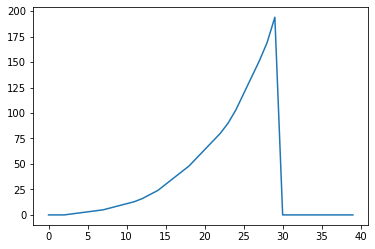

In [110]:
#import matplotlib
import matplotlib.pyplot as plt

#plot res max
# plt.plot(res[:30,0])

#plot differences in max
#plt.plot(np.diff(res[:30,0]))

#plot sec order differences in max 
# plt.plot(np.diff(np.diff(res[:5,0])))
# plot max
# plt.plot(res[:10,0])

#plot len of results
# plt.plot(res[:10,2])

#plot diff in avg 
plt.plot(res[:40,0])
#calculate pentagonal numbers
pent = [i * (3*i - 1) // 2 for i in range(1, 35)]
pent2 = [i * (3*i + 1) // 2 for i in range(1, 35)]

print(biggest[20])
print(principle(biggest[12][0], printout=True))
print(pent)
print(pent2)

